In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [19]:
data = pd.read_csv('songs.csv', header = 0, engine='python')
print(data)

      year                           songtitle         artistname  \
0     2010  This Is the House That Doubt Built  A Day to Remember   
1     2010                     Sticks & Bricks  A Day to Remember   
2     2010                          All I Want  A Day to Remember   
3     2010                    It's Complicated  A Day to Remember   
4     2010                           2nd Sucks  A Day to Remember   
...    ...                                 ...                ...   
7569  1990                          She's Gone                Y&T   
7570  1990                          Let It Out                Y&T   
7571  1990                          Ten Lovers                Y&T   
7572  1990              Goin' Off The Deep End                Y&T   
7573  1990                           Surrender                Y&T   

                  songID            artistID  timesignature  \
0     SOBGGAB12C5664F054  AROBSHL1187B9AFB01              3   
1     SOPAQHU1315CD47F31  AROBSHL1187B9AFB01 

In [20]:
data.pop("year")
data.pop("songtitle")
data.pop("artistname")
data.pop("songID")
data.pop("artistID")
print(data.columns)

Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')


In [21]:
x = data.loc[:, data.columns != 'Top10']
y = data.loc[:, data.columns == 'Top10']

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

Text(0, 0.5, 'Percentage Accuracy on Training Data Set')

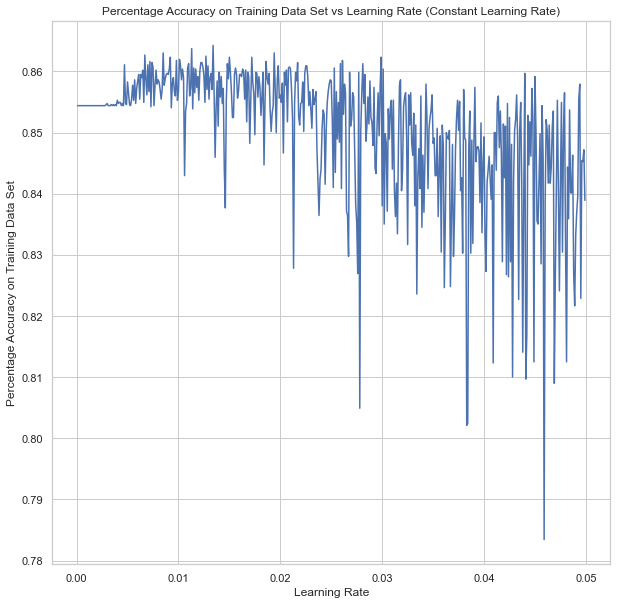

In [13]:
eta0 = np.arange(0.0001, 0.05, 0.0001)
score = np.arange(0.0001, 0.05, 0.0001)

for i in range(len(eta0)):
  sgdc = SGDClassifier(max_iter=2000, tol=0.01, eta0 = eta0[i], learning_rate = 'constant') 
  sgdc.fit(xtrain, ytrain.values.ravel())
  score[i] = sgdc.score(xtrain, ytrain)

plt.figure(figsize = (10,10))
plt.plot(eta0, score)
plt.title('Percentage Accuracy on Training Data Set vs Learning Rate (Constant Learning Rate)')
plt.xlabel('Learning Rate')
plt.ylabel('Percentage Accuracy on Training Data Set')

Text(0, 0.5, 'Percentage Accuracy on Training Data Set')

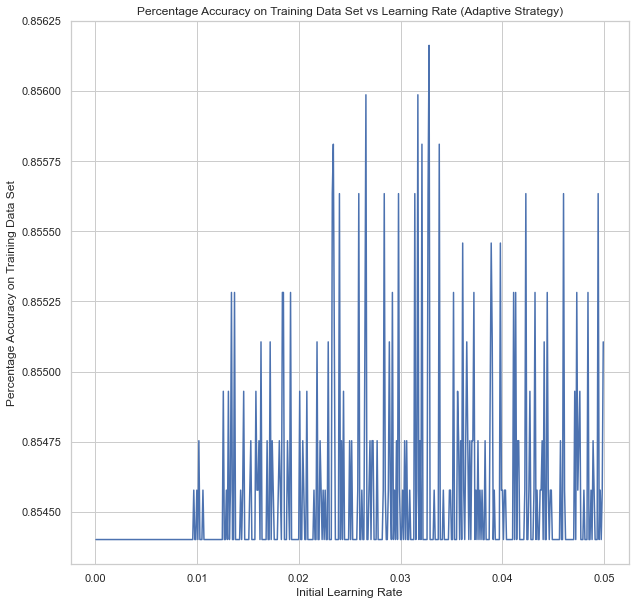

In [14]:
eta0 = np.arange(0.0001, 0.05, 0.0001)
score = np.arange(0.0001, 0.05, 0.0001)

for i in range(len(eta0)):
  sgdc = SGDClassifier(max_iter=2000, tol=0.01,early_stopping = True, eta0 = eta0[i], learning_rate = 'adaptive') 
  sgdc.fit(xtrain, ytrain.values.ravel())
  score[i] = sgdc.score(xtrain, ytrain)

plt.figure(figsize = (10,10))
plt.plot(eta0, score)
plt.title('Percentage Accuracy on Training Data Set vs Learning Rate (Adaptive Strategy)')
plt.xlabel('Initial Learning Rate')
plt.ylabel('Percentage Accuracy on Training Data Set')

In [10]:
sgdc = SGDClassifier(max_iter=2000, tol=0.01, learning_rate = 'optimal') 
sgdc.fit(xtrain, ytrain)
print(sgdc.score(xtrain, ytrain))

0.8397887323943662


c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
sgdc = SGDClassifier(max_iter=2000, tol=0.01, learning_rate = 'optimal') 
sgdc.fit(xtest, ytest)
y_pred = sgdc.predict(xtest)
print(sgdc.score(xtest, ytest))

0.8326293558606125


c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)



[[1468  134]
 [ 183  109]]
